### CART : DecisionTreeClassifier

In [58]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [108]:
iris=load_iris()
# ss=StandardScaler() # 不计算距离不需要进行标准化,标准化与否不影响结果
data=iris.data
target=iris.target
df=pd.DataFrame(data)
# df_st=ss.fit_transform(df)

In [109]:
train_x,test_x,train_y,test_y=train_test_split(data,target,test_size=0.33,random_state=0)
cart=DecisionTreeClassifier()
cart=cart.fit(train_x,train_y)
predict_y=cart.predict(test_x)
score=accuracy_score(test_y,predict_y)
print('CART分类准确率：%.4lf'%score)

CART分类准确率：0.9800


In [110]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [111]:
df.columns=iris.feature_names # 更改列名
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


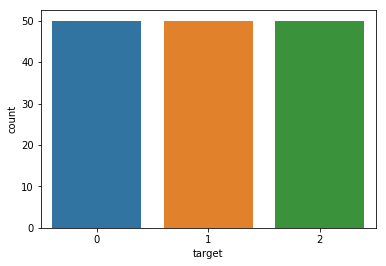

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df.targetget)

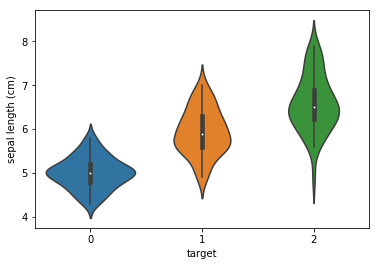

In [97]:
sns.violinplot(df.target,df["sepal length (cm)"])

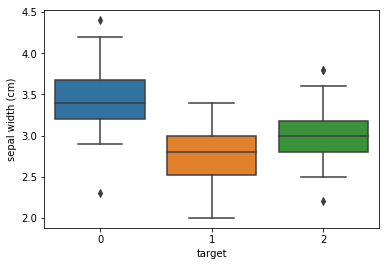

In [98]:
sns.boxplot(df.target,df["sepal width (cm)"])

In [138]:
from scipy import stats
sl0=df.loc[df.target==0]["sepal length (cm)"]
sl1=df.loc[df.target==1]["sepal length (cm)"]
sl2=df.loc[df.target==2]["sepal length (cm)"]
#标准化
sl0_n=(sl0-sl0.mean())/sl0.std()
sl1_n=(sl1-sl1.mean())/sl1.std()
sl2_n=(sl2-sl2.mean())/sl2.std()
#检测normal 
stats.kstest(sl0_n,'norm')
stats.kstest(sl1_n,'norm')
stats.kstest(sl2_n,'norm')#p>0.05则认为符合正态分布


KstestResult(statistic=0.11503428728233644, pvalue=0.4941271388827426)

In [144]:
sl_n=sl0_n.append(sl1_n).append(sl2_n)

In [155]:
df_n=pd.DataFrame({"sepal_length_n":sl_n,"target":iris.target})
df_n.tail()

,sepal_length_n,target
145,0.176134,2
146,-0.452916,2
147,-0.138391,2
148,-0.610178,2
149,-1.081966,2


In [139]:
stats.levene(sl0_n,sl1_n,sl2_n)## 结果为p>0.05,可以认为方差相等

LeveneResult(statistic=0.08625399621428266, pvalue=0.9174075883984715)